In [49]:
import pandas as pd
import lime
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Input,Conv2D, Flatten
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.optimizers import Adam
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [50]:
input_layer = Input(shape=(128,128,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=2, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [51]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_3
1 conv2d_4
2 conv2d_5
3 flatten_2
4 dense_2


In [52]:
model.count_params()

43272

In [53]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('cars',
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 80 images belonging to 2 classes.


In [54]:
train_generator.class_indices

{'normal_car': 0, 'sports_car': 1}

In [55]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 15ms/step - loss: 0.6898 - accuracy: 0.7125
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 0.1270 - accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 17ms/step - loss: 8.8131e-04 - accuracy: 1.0000


In [56]:
img_path = 'test_cars/test4.jpg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

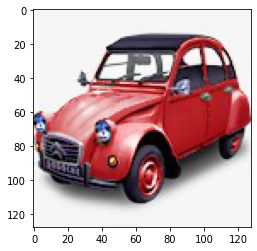

In [57]:
plt.imshow(x[0]/ 2 +0.5)

In [58]:
model.predict(x)

array([[2.2256707e-05, 9.9997771e-01]], dtype=float32)

In [59]:
explainer = lime_image.LimeImageExplainer()

In [60]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [61]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True)#, min_weight=0.0001)

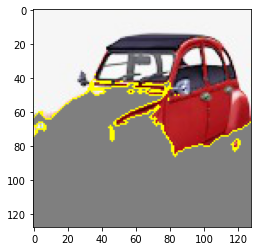

In [62]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [63]:
img_path = 'test_cars/test5.jpg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

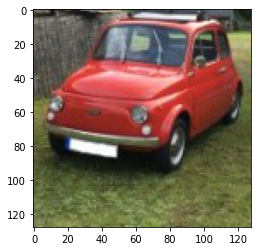

In [64]:
plt.imshow(x[0]/ 2 +0.5)

In [65]:
model.predict(x)

array([[1.7025867e-04, 9.9982977e-01]], dtype=float32)

In [66]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

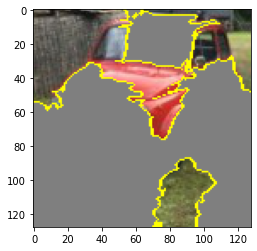

In [67]:
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True, min_weight=0.000001)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

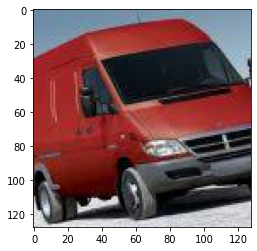

In [68]:
img_path = 'test_cars/test8.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]/ 2 +0.5)

In [69]:
model.predict(x)

array([[2.676152e-04, 9.997323e-01]], dtype=float32)

  0%|          | 0/1000 [00:00<?, ?it/s]

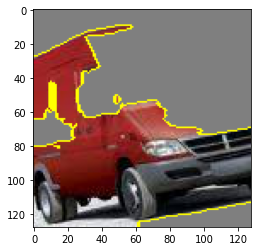

In [70]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

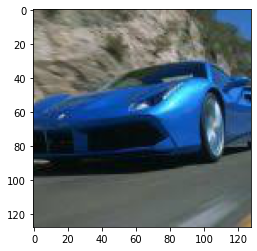

In [71]:
img_path = 'test_cars/test9.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]/ 2 +0.5)

In [72]:
model.predict(x)

array([[9.999999e-01, 1.224853e-07]], dtype=float32)

  0%|          | 0/1000 [00:00<?, ?it/s]

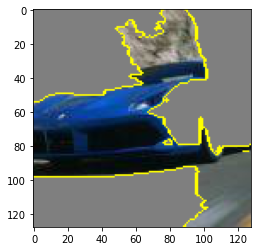

In [73]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)
temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

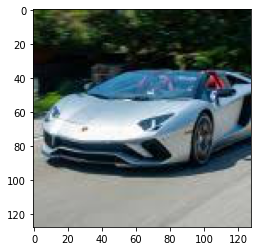

In [74]:
img_path = 'test_cars/test10.jpeg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]/ 2 +0.5)

In [75]:
model.predict(x)

array([[9.9983883e-01, 1.6119005e-04]], dtype=float32)

  0%|          | 0/1000 [00:00<?, ?it/s]

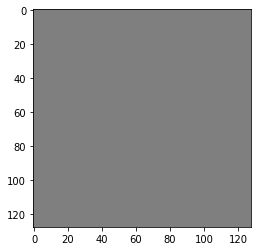

In [76]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)
temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, min_weight=0.005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

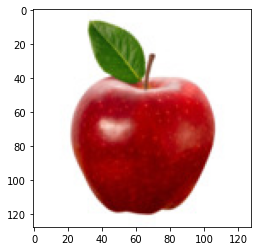

In [77]:
img_path = 'test_cars/test11.jpg'
img = image.load_img(img_path, target_size=(128, 128,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(x[0]/ 2 +0.5)

In [78]:
model.predict(x)

array([[1.7681884e-08, 1.0000000e+00]], dtype=float32)

  0%|          | 0/1000 [00:00<?, ?it/s]

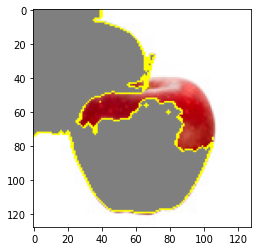

In [79]:
explanation = explainer.explain_instance(np.array(x[0], dtype=np.double), model.predict)
temp, mask = explanation.get_image_and_mask(1, positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

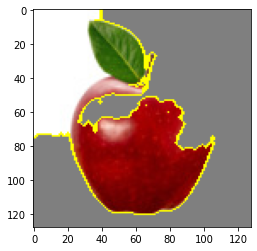

In [80]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))